In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Lambda, AvgPool1D
import librosa
import librosa.display
from scipy.io import wavfile
import pyhocon
import h5py
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [9]:
def freq_to_cents(freq, std=25):
    frequency_reference = 10
    c_true = 1200 * math.log(freq / frequency_reference, 2)

    cents_mapping = np.linspace(0, 7180, 360) + 1997.3794084376191
    target = np.exp(-(cents_mapping - c_true) ** 2 / (2 * std ** 2))
    return target

In [5]:
key = '99dcaebe-ab49-4fa3-ab6c-a9458143af8e'
# data = pd.read_csv('data/RagaDataset/pitches_orig/{}.tsv'.format(key))
data = pd.read_csv('data/RagaDataset/pitches/{}.pitch'.format(key))

In [10]:
pitches = []
for i in range(data.shape[0]):
    pitches.append(freq_to_cents(data.iloc[i,0]))

In [11]:
pitches = np.array(pitches)

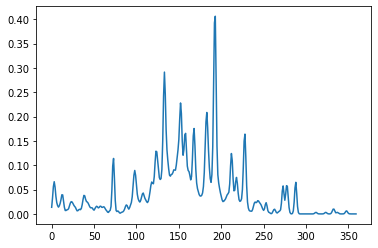

In [15]:
plt.plot(np.std(pitches, axis=0))

In [75]:
!audio-to-midi data/RagaDataset/pitches/00f54612-09f6-4528-91f1-95e5ef191c1b.pitch -b 100 -t 30

infile data/RagaDataset/pitches/00f54612-09f6-4528-91f1-95e5ef191c1b.pitch
outfile 00f54612-09f6-4528-91f1-95e5ef191c1b.pitch.mid
time_window 30.0
activation_level 0.0
condense False
condense_max False
transpose 0
key []
note_count 0
progress <audio_to_midi.progress_bar.ProgressBar object at 0x0000020A9BE7AE80>
bpm 100


window: 30.0 ms
frequencies: min = 33.333333333333336 Hz, max = 8000.0 Hz

/ |#                                                  | 0 Elapsed Time: 0:00:00
- |#                                                  | 0 Elapsed Time: 0:00:00


In [31]:
d = {'a':3, 'b':4}

In [32]:
d.a

AttributeError: 'dict' object has no attribute 'a'

In [33]:
!audio-to-midi data/sample_data/Bhup_25.wav -b 100 -t 100 --key=3

infile data/sample_data/Bhup_25.wav
outfile Bhup_25.wav.mid
time_window 100.0
activation_level 0.0
condense False
condense_max False
transpose 0
key [3]
note_count 0
progress <audio_to_midi.progress_bar.ProgressBar object at 0x00000208070FAEF0>
bpm 100


'utf-8' codec can't decode byte 0x98 in position 5: invalid start byte
Traceback (most recent call last):
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\audio_to_midi\main.py", line 133, in main
    bpm=args.bpm,
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\audio_to_midi\converter.py", line 58, in __init__
    self.info = Info(pd.read_csv(infile).shape[0])
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\pandas\io\parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\pandas\io\parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\pandas\io\parsers.py", line 946, in __init__
    self._make_engine(self.engine)
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\pandas\io\parsers.py", line 1178, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "d:\anaconda3\envs\env_tf2\lib\site-packages\pand

In [29]:
np.zeros

<function numpy.zeros>

In [91]:
raw_data = []
prev = None
for i in range(data.shape[0]):
    raw_data.extend(librosa.tone(data.iloc[i,0], duration=0.03, sr=16000))
    raw_data.extend(librosa.tone(0, duration=0.03, sr=16000))
#     break
#     raw_data.extend(librosa.tone(0, duration=0.001, sr=16000))

In [86]:
np.array(raw_data).shape

(480,)

In [68]:
def slide_min(arr1, arr2):
    if arr2 is None:
        return arr1
    m=2
    k=0
    arr3=[]
    for i in range(len(arr1)):
        t = abs(arr1[-1]-arr2[i])
        if t<m:
            m=t
            k=i
#     print(k)
    arr3 = np.concatenate([arr1, arr2[k:]])
    
    return arr3

In [92]:
raw_data = np.array(raw_data)
sm = 25
a = np.sum(raw_data[0:sm])
smoothed = [a]

for i in range(0, len(raw_data)-sm):
    a = a - raw_data[i] + raw_data[i+sm]
    smoothed.append(a)
smoothed = np.array(smoothed)/sm

In [80]:
smoothed

array([0.62002013, 0.63940295, 0.65815789, ..., 0.18940285, 0.18519607,
       0.17353061])

In [29]:
raw_data = []
for d in range(440, 500, 10):
    raw_data.extend(librosa.tone(d, duration=2, sr=16000))

In [25]:
def get_tod(val):
    day = 'day'
    morning = 'morning'
    afternoon = 'afternoon'
    evening = 'evening'
    night = 'night'
    
    tod = [day]
    tod_ind = [morning, afternoon, evening, night]
    for t in range(3,-1,-1):
        print(t)
        for i in range(val,len(tod_ind)-t):
            if t==0:
                tod.append(tod_ind[i])
            else:
                tod.append(tod_ind[i]+'-'+tod_ind[i+t])
#     tod = ['day', 'morning-evening', 'afternoon-night',
#            'morning-afternoon', 'afternoon-evening', 'evening-night',
#            'morning', 'afternoon', 'evening', 'night']
#     elif val==1:
#         tod = ['day', 'afternoon-night',
#                'afternoon-evening', 'evening-night',
#                 'afternoon', 'evening', 'night']
#     elif val==2:
#         tod = ['day', 'evening-night', 'evening', 'night']
#     else:
#         tod = ['day','night']

    return tod

In [28]:
get_tod(3)

3
2
1
0


['day', 'night']